## Importing Necessary Libraries

In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Training and Testing Datasets

In [841]:
training_data = pd.read_csv("Gotem_Pumpkins.csv")

training_data = training_data.drop("Unnamed: 0", axis = 1)
training_data = training_data.dropna()
print(training_data.dtypes)

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object


In [842]:
testing_data = pd.read_csv("Freyja_Pumpkins.csv")

testing_data = testing_data.drop("Unnamed: 0", axis = 1)
testing_data = testing_data.dropna()

## Z-Score Normalization of Training and Testing Datasets

In [843]:
training_data['Class'] = training_data['Class'].map({'Ürgüp Sivrisi': 0, 'Çerçevelik': 1})
training_numerical_features = training_data.columns.drop('Class')
training_data[training_numerical_features] = (training_data[training_numerical_features] - training_data[training_numerical_features].mean()) / training_data[training_numerical_features].std()
training_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.312590,0.678541,0.925767,-0.547452,0.301773,0.353448,1.054758,0.542376,-2.426213,-1.003730,1.102919,-1.096586,0
1,1.654705,1.326229,1.150884,1.173670,1.640110,1.607981,0.299892,0.762329,0.855600,0.130910,0.063273,-0.158400,0
2,1.290768,1.273893,1.235477,0.550975,1.280247,1.279676,0.679572,0.597365,-1.700060,-0.441830,0.524170,-0.597997,0
3,-0.810857,-0.646874,-0.475723,-0.815181,-0.796343,-0.806050,0.347071,-0.887318,-0.530239,-0.235861,0.115191,-0.225006,1
4,-0.045954,0.481882,0.803601,-0.904627,-0.042963,-0.004226,1.164843,-0.117482,0.717681,-1.314491,1.303267,-1.294500,0


In [844]:
testing_data['Class'] = testing_data['Class'].map({'Ürgüp Sivrisi': 0, 'Çerçevelik': 1})
testing_numerical_features = testing_data.columns.drop('Class')
testing_data[testing_numerical_features] = (testing_data[testing_numerical_features] - testing_data[testing_numerical_features].mean()) / testing_data[testing_numerical_features].std()
testing_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,-1.316443,-1.551248,-1.518479,-0.400523,-1.330276,-1.374056,-0.990745,0.828885,0.642669,1.107173,-1.000346,1.040843,1
1,-0.357328,-0.558725,-0.646806,0.187740,-0.364508,-0.326160,-0.498423,0.405841,0.377225,0.713802,-0.670772,0.630977,1
2,-0.352051,-0.352084,-0.158308,-0.370701,-0.367973,-0.320655,0.301863,0.969900,0.293980,0.140064,0.061135,-0.181502,0
3,0.389617,0.352048,0.406138,0.129521,0.401723,0.429394,0.383567,-0.616517,0.947380,-0.029996,0.155167,-0.261299,1
4,0.346366,0.071936,-0.325255,0.952048,0.348208,0.386891,-0.766581,-0.052458,0.315969,0.612453,-0.859452,0.859486,1


In [845]:
X_train = training_data.drop('Class', axis=1).values.astype('float64')
y_train = training_data['Class'].values.astype('float64')

X_test = testing_data.drop('Class', axis=1).values.astype('float64')
y_test = testing_data['Class'].values.astype('float64')

print("Shape of X_standarized:", X_train.shape)
print("Shape of Y_standarized:", y_train.shape)

Shape of X_standarized: (2000, 12)
Shape of Y_standarized: (2000,)


## Training The Model

In [846]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [847]:
def logistic_regression(X, y, learning_rate=0.006, iterations=5000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    for i in range(iterations):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        # Gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, bias

In [848]:
weights, bias = logistic_regression(X_train, y_train)

## Making Predictions

In [849]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.488 else 0 for i in y_pred]

In [850]:
y_pred_train = predict(X_train, weights, bias)
y_pred_test = predict(X_test, weights, bias)

## Printing Accuracy

In [851]:
train_accuracy = np.mean(y_pred_train == y_train) * 100
test_accuracy = np.mean(y_pred_test == y_test) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 87.30%
Test Accuracy: 89.20%


## Visualizing Predictions vs Actual Classes through Confusion Matrix

In [852]:
def create_confusion_matrix(y_true, y_pred):
    # Convert inputs to numpy arrays to ensure consistent handling
    y_true = np.array(y_true).astype(int)
    y_pred = np.array(y_pred).astype(int)
    
    # Initialize 2x2 matrix with zeros
    confusion_matrix = np.zeros((2, 2), dtype=int)
    
    # Calculate confusion matrix values
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[int(true)][int(pred)] += 1
    
    return confusion_matrix

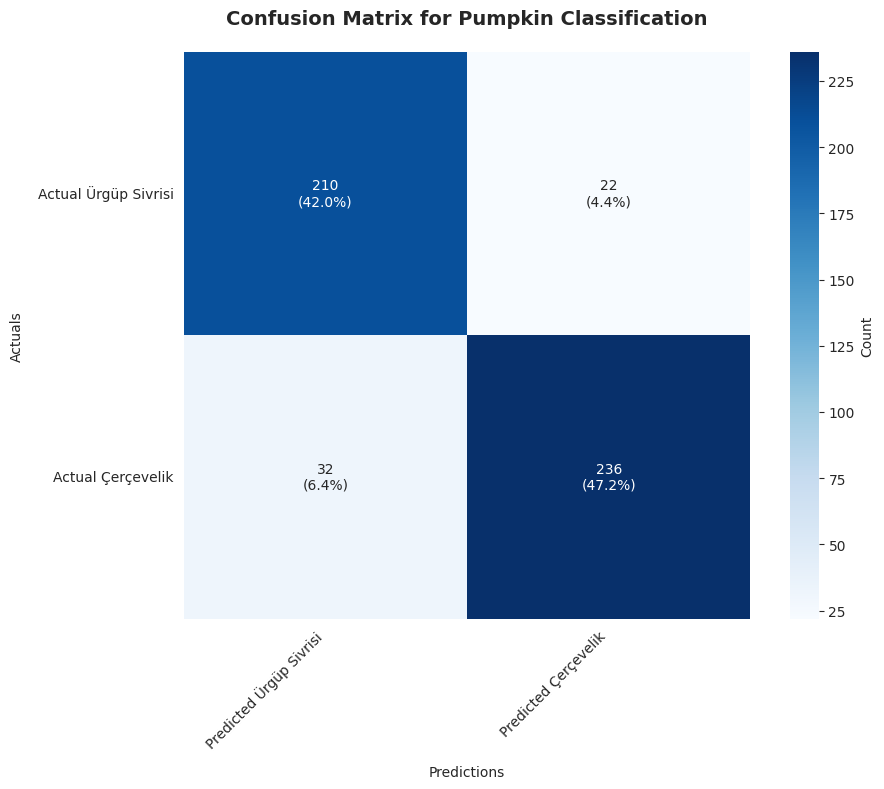

In [853]:
def plot_confusion_matrix(confusion_matrix, title="Confusion Matrix"):
    # Set the style
    sns.set_style("whitegrid")
    
    # Create figure with specified size
    plt.figure(figsize=(10, 8))
    
    # Create annotation text with both counts and percentages
    total = np.sum(confusion_matrix)
    annot_labels = np.array([[f'{val}\n({val/total*100:.1f}%)' 
                             for val in row] for row in confusion_matrix])
    blues_palette = sns.color_palette("Blues", as_cmap=True)
    # Create heatmap with enhanced styling
    ax = sns.heatmap(confusion_matrix,
                     annot=annot_labels,
                     fmt='',
                     cmap=blues_palette,  # Using a different colormap for better contrast
                     square=True,     # Make cells square
                     cbar_kws={'label': 'Count'},
                     xticklabels=['Predicted Ürgüp Sivrisi', 'Predicted Çerçevelik'],
                     yticklabels=['Actual Ürgüp Sivrisi', 'Actual Çerçevelik'])
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Add title with custom styling
    plt.title(title, pad=20, size=14, fontweight='bold')
    
    # Adjust labels
    plt.ylabel('Actuals', labelpad=10)
    plt.xlabel('Predictions', labelpad=10)
    
    # Ensure layout fits properly
    plt.tight_layout()
    
    return plt

# Calculate and plot confusion matrix
conf_matrix_test = create_confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(conf_matrix_test, "Confusion Matrix for Pumpkin Classification")
plt.show()